In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

A graph of 2 nodes:
0:[1]
1:[0]

Nodes: [0, 1]
Edges: [(0, 1)]


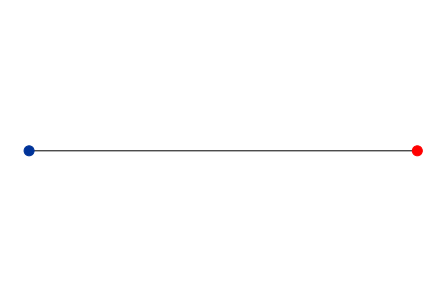

In [51]:
class Graph():
    def __init__(self):
        self.gdict = {}
        self.values = {}
        
    def add_node(self, node, val=0):
        if node not in self.gdict:
            self.gdict[node] = []
        self.values[node] = val
    
    def add_edge(self, node1, node2):        
        self.add_node(node1)
        self.add_node(node2)
        if node2 not in self.gdict[node1]:
            self.gdict[node1].append(node2)
        if node1 not in self.gdict[node2]:
            self.gdict[node2].append(node1)
  
    def delete_edge(self, node1, node2):
            if node1 not in self.gdict[node2]: return 
            self.gdict[node1].remove(node2)
            self.gdict[node2].remove(node1)
            
    def get_nodes(self):
        return list(self.gdict.keys())
    
    def get_edges(self):
        out = []
        for node,links in self.gdict.items():
            for link in links:
                if node<link:
                    out.append((node,link))
        return out
            
    def __str__(self):
        out = 'A graph of ' + str(len(self.gdict)) + ' nodes:\n'
        for node in self.gdict:
            out += str(node) + ':' + str(self.gdict[node]) + '\n'
        return out
    
    def plot(self):
        RED = (1,0,0)
        BLUE = (0,0.2,0.6)
        
        g_nx = nx.Graph()
        nodes = self.get_nodes()
        g_nx.add_nodes_from(nodes)
        g_nx.add_edges_from(self.get_edges())
        colors = []
        for i in range(len(nodes)):
            if self.values[nodes[i]]==0:
                colors.append(BLUE)
            else:
                colors.append(RED)
        nx.draw_kamada_kawai(g_nx, node_size=100, node_color=colors)
    
# Test
g = Graph()
g.add_edge(0,1)
print(g)
print('Nodes:',g.get_nodes())
print('Edges:',g.get_edges())
g.values[0] = 1
g.plot()

In [5]:
def degrees(g):
    degrees = []

    for node,links in g.gdict.items():
        degrees.append(len(links))
    print(degrees)

    hist = np.zeros(max(degrees)+1)

    for degree in degrees:
        hist[degree] += 1
    # print(hist)

    plt.plot(hist,'.-');
    plt.xlabel('Degrees')
    plt.ylabel('Frequency')
    
    return hist

NameError: name 'history' is not defined

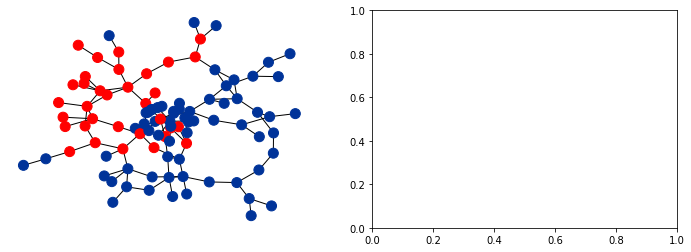

In [6]:
def random_network(n_nodes=7):
    
    N_EDGES = n_nodes

    g = Graph()

    for i in range(n_nodes):
        g.add_node(i)

    edges = []

    while len(edges) < N_EDGES:
        n1 = np.random.randint(low = 0, high = n_nodes)
        n2 = np.random.randint(low = 0, high = n_nodes)

        if n2 < n1:
            n1,n2 = n2,n1

        if (n1,n2) not in edges and n1!=n2:
            g.add_edge(n1,n2)
            edges.append((n1,n2))
    return g

# print(g)
g = random_network(100)
p = pandemic(g, prob=0.5, nsteps=10, n_nodes=7)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
plt.plot(history);
plt.xlabel('Day');
plt.ylabel('Number of new cases');

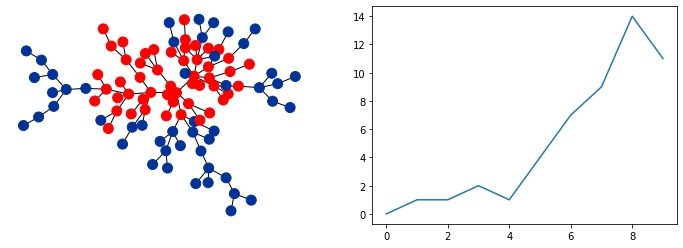

In [7]:
def rich_club_network(n_nodes=7):
    g = Graph()
    for i in range(n_nodes):
        if i==0:
            g.add_node(0)
        else:
            g.add_edge(i, np.random.randint(low=0, high=i))
    return g

g = rich_club_network(100)
p = pandemic(g, prob=0.5, nsteps=10, ntrials=10, n_nodes=7)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
plt.plot(p);

[4, 3, 9, 5, 3, 2, 2, 2, 2, 2]


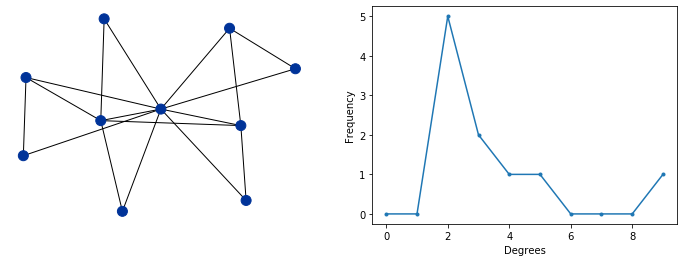

In [28]:
def barabasi(n_nodes=7):
    g = Graph()
    degrees = np.zeros(n_nodes)
    nodes = np.array(range(n_nodes))
    for i in range(n_nodes):
        if i==0:
            g.add_node(0)
        elif i==1:
            g.add_edge(1,0)
            degrees[0] = 1
            degrees[1] = 1
        else:
            connections = np.random.choice(nodes[:i], size=2, replace=False, p=degrees[:i]/np.sum(degrees))
            for node in connections:
                g.add_edge(i, node)
                degrees[node] += 1
            degrees[i] = 2
    return g

g = barabasi(10)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
degrees(g);

[33, 9, 22, 4, 13, 10, 3, 5, 6, 3, 18, 6, 5, 4, 3, 7, 3, 3, 2, 6, 4, 6, 5, 5, 2, 3, 3, 3, 5, 4, 6, 4, 4, 2, 3, 3, 3, 2, 2, 5, 4, 2, 3, 3, 2, 6, 3, 5, 4, 3, 2, 3, 2, 2, 2, 2, 4, 4, 2, 3, 2, 2, 4, 4, 2, 4, 4, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 8, 21, 3, 12, 9, 2, 5, 5, 2, 17, 6, 4, 3, 3, 7, 2, 3, 1, 5, 4, 5, 5, 5, 2, 3, 3, 2, 5, 3, 6, 3, 3, 2, 3, 2, 2, 2, 2, 5, 3, 1, 3, 3, 2, 6, 3, 5, 4, 3, 2, 3, 2, 2, 2, 2, 4, 4, 2, 3, 1, 1, 4, 4, 2, 4, 4, 3, 2, 2, 1, 2, 3, 3, 3, 2, 2, 1, 3, 2, 1, 3, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1]


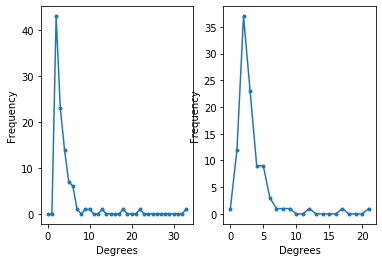

In [53]:
def remove_hub(g):
    highest_so_far = 0
    best_node = None
    for node,links in g.gdict.items():
        if len(links)>highest_so_far:
            highest_so_far = len(links)
            best_node = node
    #print(best_node, g.gdict[best_node])
    for node in g.gdict[best_node].copy():
        g.delete_edge(best_node, node)

# Test
g = barabasi(100)
plt.subplot(121);
degrees(g);
remove_hub(g)
plt.subplot(122);
degrees(g);

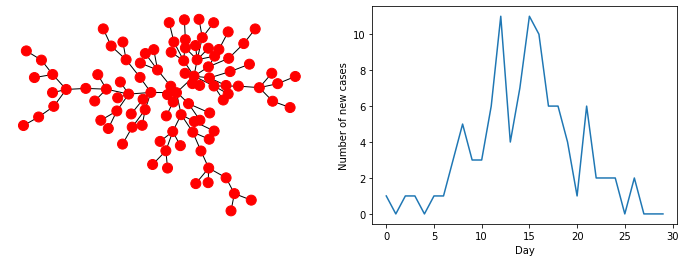

In [12]:
def pandemic(g, prob=0.5, nsteps=10, ntrials=10, n_nodes=7):
    nodes = g.get_nodes()
    for node in nodes:
        g.values[node] = 0     
        patientzero = np.random.randint(low=0, high=len(nodes))
    g.values[patientzero] = 1             

    history = np.zeros(nsteps)

    for t in range(nsteps):
        new_cases = []
        for node in nodes:
            if g.values[node]==1:
                neighbors = g.gdict[node]
                for neighbor in neighbors:
                    if g.values[neighbor]==0 and np.random.uniform()<prob:
                        new_cases.append(neighbor)
        for node in new_cases:
            g.values[node] = 1
        history[t] = len(new_cases)
    return history

history = pandemic(g, prob=0.5, nsteps=30, ntrials=30, n_nodes=7)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
plt.plot(history);
plt.xlabel('Day');
plt.ylabel('Number of new cases');

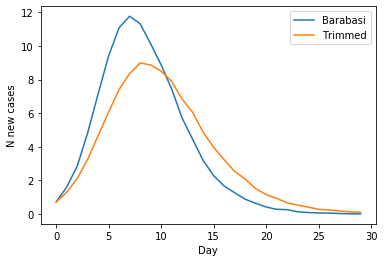

In [54]:
N_STEPS = 30
N_TRIALS = 500
PROB = 0.2     

history = np.zeros(shape=(N_STEPS, N_TRIALS*2))
for i in range(N_TRIALS):
    g = barabasi(100)
    history[:,i] = pandemic(g, prob=PROB, nsteps=N_STEPS)
    remove_hub(g)
    history[:,i+N_TRIALS] = pandemic(g, prob=PROB, nsteps=N_STEPS)
    
plt.plot(np.mean(history[:,:N_TRIALS],axis=1), label='Barabasi');
plt.plot(np.mean(history[:,N_TRIALS:],axis=1), label='Trimmed');   
plt.xlabel('Day');
plt.ylabel('N new cases');
plt.legend(loc='upper right');